In [114]:
import pandas as pd

In [115]:
data = pd.read_csv('User_Data.csv')
df = pd.DataFrame(data)

In [116]:
display(df)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [117]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [118]:
X = df.iloc[:,[2,3]]
Y = df.iloc[:,4]


In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.15 , random_state=0)

In [120]:
from sklearn.preprocessing import StandardScaler    
std_x= StandardScaler()    
x1_train= std_x.fit_transform(x_train)    
x1_test= std_x.transform(x_test)  

In [121]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=1)
lg.fit(x1_train, y_train)
y_pred = lg.predict(x1_test)

In [122]:
lg.score(x1_train, y_train)


0.8235294117647058

In [123]:
lg.score(x1_test, y_test)   

0.9333333333333333

In [124]:
#lg1 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, 
#                         max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=0, 
#                         solver='lbfgs', tol=0.0001, verbose=0, warm_start=False) 
#lg1.fit(x1_train, y_train)
#y_pred = lg1.predict(x1_test)


In [125]:
#lg1.score(x1_train, y_train)


In [126]:
#lg1.score(x1_test, y_test)   

In [127]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[44,  1],
       [ 3, 12]], dtype=int64)

<Axes: >

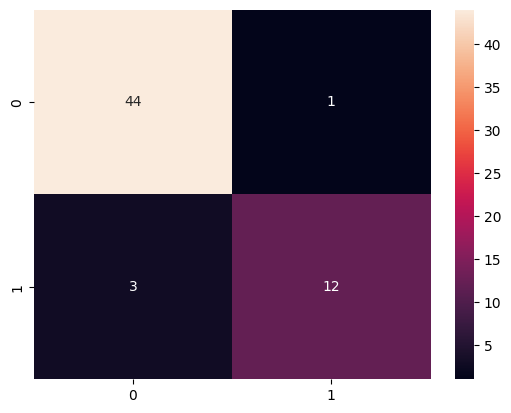

In [128]:
import seaborn as sns
sns.heatmap(cf, annot=True)

In [129]:
from sklearn.metrics import classification_report

# Generating a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.92      0.80      0.86        15

    accuracy                           0.93        60
   macro avg       0.93      0.89      0.91        60
weighted avg       0.93      0.93      0.93        60



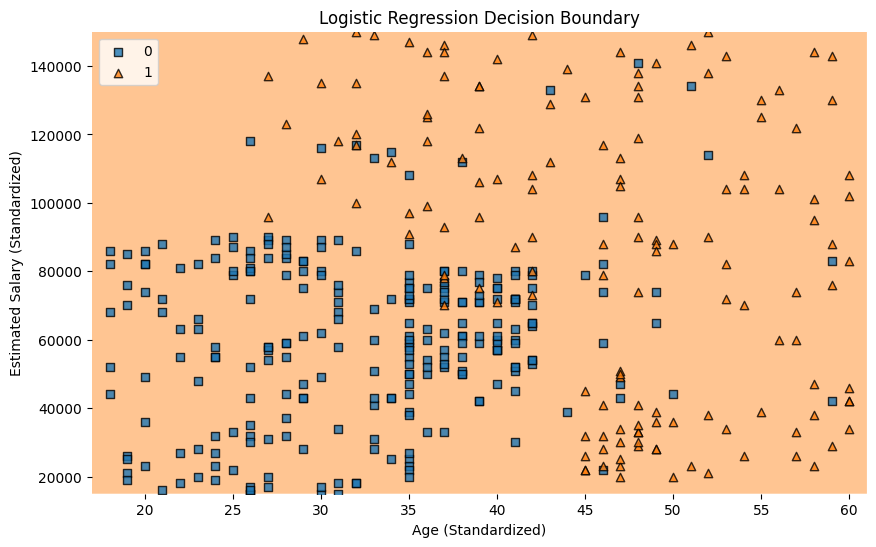

In [132]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(10, 6))
plot_decision_regions(X_combined, y_combined, clf=lg)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age (Standardized)')
plt.ylabel('Estimated Salary (Standardized)')
plt.legend(loc='upper left')
plt.show()
